## Loading Libraries

In [1]:
from skimage.filters import gabor
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from utils.DatasetHelper import *
from utils.ModelHelper import *
from utils.PlotHelper import *

## Dataset Paths

In [3]:
def prepare_X_y_histogran_equalized():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_histogram_equilazed(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_histogram_equilazed(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_edge_boosted():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_edge_boosted(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_edge_boosted(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_edge_boosted_histogram_equalized():
    train_folder = '../../../../Data/fer2013/train'
    test_folder = '../../../../Data/fer2013/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_edge_boosted_histogram_equilazed(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_edge_boosted_histogram_equilazed(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_blurred():
    train_folder = '../../../../Data/merged/train'
    test_folder = '../../../../Data/merged/validation'
    images_train, labels_train = load_images_from_folder_fer_2013_blurred(train_folder)
    images_test, labels_test = load_images_from_folder_fer_2013_blurred(test_folder)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y(max_images_per_class=None):
    train_folder = '../../../../Data/merged/train'
    test_folder = '../../../../Data/merged/validation'
    images_train, labels_train = load_images_from_folder_fer_2013(train_folder, max_images_per_class)
    images_test, labels_test = load_images_from_folder_fer_2013(test_folder, max_images_per_class)
    X = np.concatenate((images_train, images_test), axis=0)
    y = np.concatenate((labels_train, labels_test), axis=0)
    return X, y

def prepare_X_y_Expw(max_images_per_class=None):
    train_folder = '../../../../Data/Expw-F-Preprocessed_100x100'
    # test_folder = '../../../../Data/Expw/validation'
    X, y = load_images_from_folder_expW(train_folder, max_images_per_class = max_images_per_class)
    # images_test, labels_test = load_images_from_folder_expw(test_folder, max_images_per_class)
    return X, y

In [12]:
# X_h_e,y_h_e = prepare_X_y_histogran_equalized()
# X_e_b,y_e_b = prepare_X_y_edge_boosted()
# X_e_b_h_e,y_e_b_h_e = prepare_X_y_edge_boosted_histogram_equalized()
# X,y = prepare_X_y()
# X_blurred, y_blurred = prepare_X_y_blurred()

X, y = prepare_X_y_Expw(max_images_per_class=7000)


label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/happy
Reached maximum number of images for class happy. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/sad
Reached maximum number of images for class sad. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/fear
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/surprise
Reached maximum number of images for class surprise. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/neutral
Reached maximum number of images for class neutral. Skipping the rest.
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/angry
label_folder_path:  ../../../../Data/Expw-F-Preprocessed_100x100/disgust


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('normal images')
    plt.imshow(X[i].reshape(100, 100), cmap=plt.get_cmap('gray'))

In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('histogram equalized images')
    plt.imshow(X_h_e[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('edge boosted images')
    plt.imshow(X_e_b[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


In [ ]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.suptitle('histogram equalized & edge boosted images')
    plt.imshow(X_e_b_h_e[i].reshape(48, 48), cmap=plt.get_cmap('gray'))


## HOG

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train_hogged, X_test_hogged = apply_hog_and_pca(X_train, X_test, y_train, y_test, shape=100)

knn_preds = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=30)

Test seti üzerindeki doğruluk: 0.28


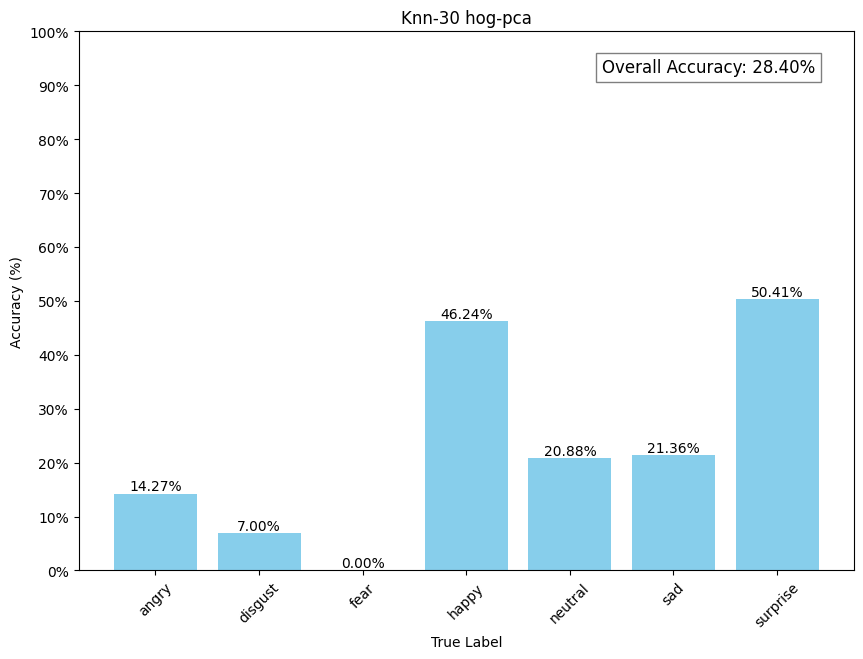

f1 score:  0.25883749286041724


In [15]:
from sklearn.metrics import f1_score


plot_label_accuracies(y_test, knn_preds, 'Knn-30 hog-pca')

#f1 score
f1 = f1_score(y_test, knn_preds, average='weighted')
print('f1 score: ', f1)

In [22]:
import xgboost as xgb


def classify_with_xgboost(X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier(eval_metric='mlogloss')
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return y_pred
xg_preds = classify_with_xgboost(X_train_hogged, X_test_hogged, y_train, y_test)

(29403, 212)
(29403,)


/opt/homebrew/lib/python3.11/site-packages/xgboost/sklearn.py:1469: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or not (classes == expected_classes).all()


AttributeError: 'bool' object has no attribute 'all'

In [ ]:
X_train_hogged, X_test_hogged = apply_hog_and_pca(X_train, X_test, y_train, y_test)

knn_preds_30 = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=30)

In [ ]:
plot_label_accuracies(y_test, knn_preds_30, 'SVM hog-pca')

In [ ]:
X_train_hogged, X_test_hogged = apply_hog_and_pca(X_train, X_test, y_train, y_test)

k_s = [3, 5, 10, 15, 20, 30, 50]
knn_pred_list = []
for k in k_s:
    knn_preds = classify_with_knn(X_train_hogged, X_test_hogged, y_train, y_test, n_neighbors=k)
    knn_pred_list.append({'k': k, 'knn_preds': knn_preds})
    plot_label_accuracies(y_test, knn_preds, 'KNN hog-pca k={}'.format(k))

----

In [ ]:
X_gabor_lda_e_b = apply_gabor_and_pca(X_e_b,y_e_b)

X_train, X_test, y_train, y_test = train_test_split(X_gabor_lda_e_b, y_e_b, test_size=0.2, random_state=42)

y_pred_euclidian = predict_with_euclidean_distance(X_train, y_train, X_test)

In [ ]:
plot_label_accuracies(y_test, y_pred_euclidian, "Euclidian edge_boosted & gabor & pca")

## Try This Too

------

In [ ]:
import numpy as np
from skimage import io
from sklearn.feature_extraction import image

def extract_patches(img, patch_size, max_patches=None):
    """
    img: tek bir yüz görüntüsü, 48x48 piksel
    patch_size: çıkarılacak patch'in boyutu, örneğin (24, 24)
    max_patches: çıkarılacak maksimum patch sayısı, örneğin 100
    """
    patches = image.extract_patches_2d(img, patch_size, max_patches=max_patches)
    return patches

def process_image_set(X, patch_size=(24, 24), max_patches=100):
    """
    X: FER2013 görüntü seti, her bir görüntü 48x48 piksel
    patch_size: çıkarılacak patch'in boyutu
    max_patches: her görüntü için çıkarılacak maksimum patch sayısı
    """
    # Tüm görüntüler için patch'leri çıkar
    all_patches = [extract_patches(img.reshape(48, 48), patch_size, max_patches) for img in X]
    return np.array(all_patches)

# Örnek kullanım:
# X burada FER2013 veri setinden yüklenen görüntüleri temsil ediyor.
# X'i numpy array olarak yüklediğinizi varsayıyorum.
# Örnek bir görüntü seti için patch çıkarma işlemi
patches = process_image_set(X_train, patch_size=(24, 24), max_patches=100)

# Sonraki adımlar: Bu patch'leri kullanarak özellik çıkarma, eğitim ve sınıflandırma yapabilirsiniz.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import KMeans
from skimage.filters import gabor
import numpy as np

def extract_gabor_features(image, patch_size=(24, 24), max_patches=50):
    # Gabor özniteliklerini çıkarmak için bir fonksiyon
    patches = extract_patches_2d(image, patch_size, max_patches=max_patches)
    features = []
    for patch in patches:
        filt_real, filt_imag = gabor(patch, frequency=0.6)
        features.append(np.abs(filt_real).flatten())
    return np.array(features)

def find_important_patches(X, y, num_clusters=10):
    # Her bir duygu için en önemli patch'leri bulmak için bir fonksiyon
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        # O duygu için tüm görüntüleri al
        emotion_images = X[y == emotion]
        
        # Tüm görüntülerden patch'leri çıkar ve öznitelikleri hesapla
        all_features = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            features = extract_gabor_features(img)
            all_features.append(features)
        
        # Tüm öznitelikleri birleştir
        all_features = np.vstack(all_features)
        
        # PCA ile boyut indirgeme
        pca = PCA(n_components=0.95)  # Varyansın %95'ini koru
        reduced_features = pca.fit_transform(all_features)
        
        # KMeans ile kümeleme
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(reduced_features)
        
        # En önemli patch'leri bul
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            important_patches[emotion].append(all_features[important_patch_idx])
            
    return important_patches

# Veri seti yükleme ve ön işleme
# X, y = load_dataset(...) # Veri setinizi yükleyin ve X, y şeklinde ayırın

# Önemli

important_patches = find_important_patches(X_train, y_train)

In [ ]:
important_patches
# Önemli patch'leri görselleştir
fig, ax = plt.subplots(1, 10, figsize=(20, 20))
for i, patch in enumerate(important_patches['happy']):
    ax[i].imshow(patch.reshape(24, 24), cmap='gray')
    ax[i].axis('off')
plt.show()

# Patchleri train datasetinden örnek birkaç görüntüde denk geldiği noktaya göre görselleştir
fig, ax = plt.subplots(3, 10, figsize=(20, 20))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.cluster import KMeans
from skimage.filters import gabor
import numpy as np

def extract_gabor_features(image, patch_size=(8, 8), max_patches=4):
    # Gabor özniteliklerini çıkarmak için bir fonksiyon
    patches = extract_patches_2d(image, patch_size, max_patches=max_patches)
    
    features = []
    for patch in patches:

        filt_real, filt_imag = gabor(patch, frequency=0.6)
        # features.append(np.abs(patch).flatten())
        features.append(np.abs(filt_real).flatten())
    return np.array(features)

def find_important_patches(X, y, num_clusters=10, patch_size = (8,8)):
    # Her bir duygu için en önemli patch'leri bulmak için bir fonksiyon
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    all_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        if emotion != 'angry' and emotion != 'happy':
            continue
        # O duygu için tüm görüntüleri al
        emotion_images = X[y == emotion]

        # Tüm görüntülerden patch'leri çıkar ve öznitelikleri hesapla
        all_features = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            features = extract_gabor_features(img, patch_size=patch_size)
            all_features.append(features)

            # #plot the filtered images
            # fig, ax = plt.subplots(1, 4, figsize=(20, 20))
            # for i, patch in enumerate(features):
            #     ax[i].imshow(patch.reshape(patch_size[0], patch_size[1]), cmap='gray')
            #     ax[i].axis('off')
            # plt.show()
        
        # Tüm öznitelikleri birleştir
        all_features = np.vstack(all_features)
        # print(all_features)
        # PCA ile boyut indirgeme
        pca = PCA(n_components=5)
        reduced_features = pca.fit_transform(all_features)
        
        # KMeans ile kümeleme
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(reduced_features)
        
        # En önemli patch'leri bul
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            print(important_patch_idx)
            important_patches[emotion].append(all_features[important_patch_idx])
        all_patches[emotion] = all_features
            
    return all_patches, important_patches 

patch_size = (16,16)
all_patches, important_patches = find_important_patches(X_train, y_train, patch_size=patch_size)





In [ ]:
# Önemli patch'leri görselleştir
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i, patch in enumerate(important_patches['happy']):
    ax[i].imshow(patch.reshape(patch_size[0], patch_size[1]), cmap='gray')
    ax[i].axis('off')
plt.show()

In [ ]:
from matplotlib import patches

# def visualize_patches(image, patchess, patch_size=(24, 24)):
#     """
#     image: Orijinal görüntü
#     patches: Görselleştirmek istediğiniz patch'lerin listesi (patch'lerin konumları)
#     patch_size: Her bir patch'in boyutu
#     """
#     fig, ax = plt.subplots(1)
#     ax.imshow(image, cmap='gray')

#     for patch in patchess:
#         # print(patch)
#         y, x = divmod(image.shape[1], patch)
#         # print(y,x)

#     for i in range(len(x)):
#         rect = patches.Rectangle((x[i], y[i]), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
#         ax.add_patch(rect)

#     plt.show()

X_train_angry = X_train[y_train == 'angry']
X_train_happy = X_train[y_train == 'happy']


def visualize_patches(image, patch_positions, patch_size=(24, 24)):
    """
    image: Original image.
    patch_positions: List of tuples indicating the top-left corner positions of patches to visualize.
    patch_size: The size of each patch.
    """
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')

    for position in patch_positions:
        print(position)
        (y, x) = position  # Assuming position is a tuple (y, x)
        rect = patches.Rectangle((x, y), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()



visualize_patches(X_train_angry[3].reshape(48, 48), important_patches['happy'], patch_size=patch_size)

MY OWN PATCH FUN


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from skimage.filters import gabor
import numpy as np

def extract_patches_with_positions(image, patch_size=(8, 8), max_patches=None):
    patches = []
    positions = []
    h, w = image.shape
    for y in range(0, h - patch_size[0] + 1, patch_size[0]):
        for x in range(0, w - patch_size[1] + 1, patch_size[1]):
            patch = image[y:y+patch_size[0], x:x+patch_size[1]]
            patches.append(patch)
            positions.append((y, x))
            if max_patches and len(patches) >= max_patches:
                break
        if max_patches and len(patches) >= max_patches:
                break
    return patches, positions

def extract_gabor_features(patches):
    features = []
    for patch in patches:
        filt_real, filt_imag = gabor(patch, frequency=0.6)
        features.append(np.abs(filt_real).flatten())
    return np.array(features)

def find_important_patches(X, y, num_clusters=10, patch_size=(8,8)):
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    all_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        if emotion != 'angry' and emotion != 'happy':
            continue
        emotion_images = X[y == emotion]

        all_features = []
        all_positions = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            patches, positions = extract_patches_with_positions(img, patch_size=patch_size)
            features = extract_gabor_features(patches)
            all_features.extend(features)
            all_positions.extend(positions)

        all_features = np.array(all_features)
        
        pca = PCA(n_components=10)
        reduced_features = pca.fit_transform(all_features)
        
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(reduced_features)
        
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            important_patches[emotion].append(all_positions[important_patch_idx])
            all_patches[emotion].append(all_features[important_patch_idx])

    return all_patches, important_patches


In [ ]:
X_train_angry = X_train[y_train == 'angry']
X_train_happy = X_train[y_train == 'happy']

def visualize_patches(image, patch_positions, patch_size=(24, 24)):
    """
    image: Original image.
    patch_positions: List of tuples indicating the top-left corner positions of patches to visualize.
    patch_size: The size of each patch.
    """
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')

    for position in patch_positions:
        print(position)
        (y, x) = position  # Assuming position is a tuple (y, x)
        rect = patches.Rectangle((x, y), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()



visualize_patches(X_train_angry[0].reshape(48, 48), important_patches['angry'], patch_size=patch_size)

In [ ]:
important_patch_coordinates = [features for features in important_patches.values() if len(features) > 0]
important_patch_labels = [emotion for emotion, features in important_patches.items() if len(features) > 0]

def visualize_image_on_specific_patches(image, patch_positions, patch_size=(24, 24)):
    # İlk olarak, beyaz bir arka plan oluştur
    white_background = np.ones_like(image) * 255
    
    # Şimdi, her bir yama pozisyonu için, ilgili görüntü bölümünü beyaz arka plan üzerine kopyala
    for position in patch_positions:
        y, x = position
        white_background[y:y+patch_size[1], x:x+patch_size[0]] = image[y:y+patch_size[1], x:x+patch_size[0]]
    
    # Sonuç görüntüyü göster
    plt.imshow(white_background, cmap='gray')
    plt.axis('off') # Eksenleri gizle
    plt.show()
    
visualize_image_on_specific_patches(X_train_angry[0].reshape(48, 48), important_patch_coordinates[0], patch_size=patch_size)

In [ ]:
def find_important_patches_without_gabor(X, y, patch_size=(8,8)):
    unique_emotions = np.unique(y)
    important_patches = {emotion: [] for emotion in unique_emotions}
    all_patches = {emotion: [] for emotion in unique_emotions}
    
    for emotion in unique_emotions:
        if emotion != 'angry' and emotion != 'happy':
            continue
        emotion_images = X[y == emotion]

        all_features = []
        all_positions = []
        for img in emotion_images:
            img = img.reshape(48, 48)  # Eğer gerekirse, img'i yeniden şekillendir
            patches, positions = extract_patches_with_positions(img, patch_size=patch_size)
            patches = np.array(patches)
            patches = patches.reshape(patches.shape[0], -1)  # Reshape patches to 2D
            all_features.extend(patches)
            all_positions.extend(positions)

        all_features = np.array(all_features)
        
        pca = PCA(n_components=10)
        reduced_features = pca.fit_transform(all_features)
        
        kmeans = KMeans(n_clusters=10)
        kmeans.fit(reduced_features)
        
        centers = kmeans.cluster_centers_
        for center in centers:
            distances = np.linalg.norm(reduced_features - center, axis=1)
            important_patch_idx = np.argmin(distances)
            important_patches[emotion].append(all_positions[important_patch_idx])
            all_patches[emotion].append(all_features[important_patch_idx])

    return all_patches, important_patches

In [ ]:
patch_size = (4,4)
# all_patches, important_patches = find_important_patches(X_train, y_train, patch_size=patch_size)

all_patches_without_gabor, important_patches_without_gabor = find_important_patches_without_gabor(X_train, y_train, patch_size=patch_size)

In [ ]:
important_patches_without_gabor['angry']

visualize_image_on_specific_patches(X_train_angry[0].reshape(48, 48), important_patches_without_gabor['happy'], patch_size=patch_size)

In [ ]:
import numpy as np
from sklearn.feature_extraction.image import extract_patches_2d

def calculate_average_patch(images, patch_size=(8, 8)):
    """Her koordinat için patch'lerin ortalamasını hesaplar."""
    # Görüntü boyutlarına ve patch boyutuna bağlı olarak tüm patch'lerin toplamını ve sayısını saklayacak yapı
    patch_sums = np.zeros((images[0].shape[0] - patch_size[0] + 1, images[0].shape[1] - patch_size[1] + 1, patch_size[0], patch_size[1]))
    patch_counts = np.zeros(patch_sums.shape[:2])
    
    # Tüm görüntüler için patch'leri çıkar ve topla
    for image in images:
        patches = extract_patches_2d(image, patch_size)
        for i in range(patches.shape[0]):
            y, x = i // patch_counts.shape[1], i % patch_counts.shape[1]  # Patch'in koordinatını hesapla
            patch_sums[y, x] += patches[i]
            patch_counts[y, x] += 1
    
    # Ortalama patch'leri hesapla
    average_patches = patch_sums / patch_counts[:,:,None,None]
    
    return average_patches

def find_most_similar_patches(images, average_patches, patch_size=(8, 8)):
    """Her koordinat için ortalama patch'e en çok benzeyen patch'i bulur."""
    similar_patches_coordinates = []
    for y in range(average_patches.shape[0]):
        for x in range(average_patches.shape[1]):
            min_distance = np.inf
            min_idx = None
            for idx, image in enumerate(images):
                patch = extract_patches_2d(image[y:y+patch_size[0], x:x+patch_size[1]], patch_size)
                distance = np.linalg.norm(patch - average_patches[y, x])
                if distance < min_distance:
                    min_distance = distance
                    min_idx = (idx, y, x)
            similar_patches_coordinates.append(min_idx)
    
    return similar_patches_coordinates

# Örnek kullanım
images = X_train_angry[:10]  # Bu, numpy array'leri olan görüntü listesi olmalı
patch_size = (8, 8)
average_patches = calculate_average_patch(images, patch_size)
similar_patches = find_most_similar_patches(images, average_patches=average_patches, patch_size=patch_size)
